# Chapter 3: Model Learning

- This Jupyter Notebook is a supplement for the [Machine Learning Simplified](https://themlsbook.com) (MLS) book. Note that all detailed explanations are written in the book. This notebook just shed light on Python implementations of the topics discussed.
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my notebooks. 

> Let's recall Chapter 3. We have a hypothetical dataset (Table 3.1) of six apartments located in the center of Amsterdam along with their prices (in 10,000 EUR) and floor areas (in square meters).

| area ($m^2$) | price (in €10,000) |
| ----------- | ----------- |
| 30 | 31 | 
| 46 | 30 |
| 60 | 80 |
| 65 | 49 |
| 77 | 70 |
| 95 | 118 |

> The structure of this notebook is similar to the structure of Chapter 3 of [MLS](https://themlsbook.com) book.

> 1. Problem Representation
> 2. Learning a Prediction Function
> 3. How Good is our Prediction Function?
> 4. Build Regressions with Wrong Parameters
> 5. Cost Function
> 6. Gradient Descent

# 0. Required Libraries & Functions

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Problem Representation


## 1.1. Create Hypothetical Dataset

> To create two arrays, X and Y, we use `numpy` (`np`) library. We have already loaded it in the beginning of this notebook.

In [16]:
x = np.array([[30], [46], [60], [65], [77], [95]])
y = np.array([31, 30, 80, 49, 70, 118])

## 1.2. Visualize the Dataset

> Let's now make the same graph that we had in the book (Figure 3.1). We can do so by using `matplotlib` library that we loaded in the beginning of this notebook.

(0.0, 110.0)

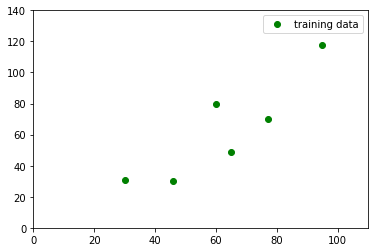

In [5]:
fig, ax = plt.subplots() #define the graph
ax.plot(x, y, 'o', color='g', label='training data')

plt.legend(); #show legend
plt.ylim(0, 140) #length of y-axis
plt.xlim(0, 110) #length of x-axis

# 2. Learning a Prediction Function

Let's now build a simple regression with our data and then visualize it with the graph.

## 2.1. Build a Linear Regression

> First, we **initialize** our `Linear Regression` algorithm. We use `LinearRegression` from `sklearn` library that we loaded in the beginning.

In [8]:
# Initialize the linear regression model
reg = LinearRegression()

> Second, we pass `x` and `y` to that algorithm for learning.

In [27]:
reg = LinearRegression().fit(x, y) #train your model with x-values

Checking estimated coefficient and intercept:

In [30]:
print(' coefficient (parameter a) = {} \n intercept (parameter b) = {}'.format(reg.coef_[0].round(1), 
                                                                               reg.intercept_.round(0)))

 coefficient (parameter a) = 1.3 
 intercept (parameter b) = -18.0


## 2.2. Vizualize Linear Regression

Plotting the regression model:

(0.0, 110.0)

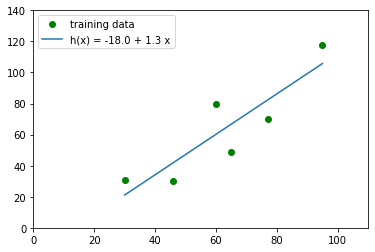

In [42]:
fig, ax = plt.subplots() #define the graph
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, reg.intercept_ + reg.coef_[0]*x, label='h(x) = {} + {} x'.format(reg.intercept_.round(0), 
                                                                         reg.coef_[0].round(2))) 

plt.legend(); #show legend
plt.ylim(0, 140) #length of y-axis
plt.xlim(0, 110) #length of x-axis

# 3. How Good is our Prediction Function?

> The next step is to evaluate how good our model is. To do so, let's firt show residuals.

## 3.1. Draw Residuals

> Let's draw residuals - the difference between actual data points and the predicted (by our model) values.

/Users/andrewwolf/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


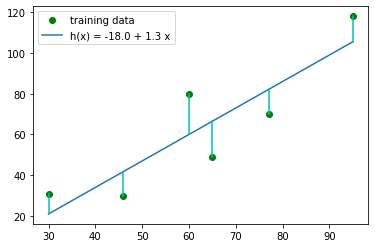

In [41]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, -18.0  + 1.3*x, label='h(x) = {} + {} x'.format(reg.intercept_.round(0), 
                                                           reg.coef_[0].round(2))) 

for i in range(len(x)):
    ax.plot([x[i], x[i]], [-18.0  + 1.3*x[i],y[i]], '-', color='c')
plt.legend();

## 3.2. Calculating Sum of Squared Residuals (SSR)

> Let's calculate SSR. The formula for calculating SSR is:
  $$SSR = \sum (y_i-\hat{y}_i)^2$$
  > where
  > - $y_i$ is a value of an observed target variable $i$
  > - $\hat{y}_i$ is a value of $y$ predicted by the model with a specific $x_i$ ($\hat{y}_i=ax_i+b$)


In [6]:
# Defining lists
y_pred = [] #set empty list for predicted values of y
r = [] #set empty list for residuals

# Calculating predicted values of y
for i in x:
    y_pred.append(-18 + 1.3*i)
    
# Calculating residuals
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

# Summing up the residuals
np.sum(r)

1248.1500000000003

# 4. Build Regressions with Wrong Parameters

> Just like we did in the [MLS](https://themlsbook.com) book, let's now build two regressions with random values for coefficient ($a$) and intercept ($b$), and see how their SSR would differ from the "true" regression $y=1.3x -18$ (estimated in Section 2.1.)

## 4.1. Regression I

> Let's plot regression $y=-10x+780$ and calculate its SSR.

(0.0, 110.0)

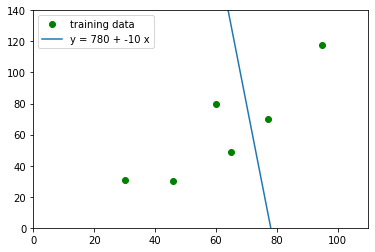

In [48]:
# Plotting Regression

fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, 780 + -10*x, label='y = 780 + -10 x')

plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [8]:
# Calculating SSR

y_pred = []
r = []

for i in x:
    y_pred.append(780 + -10*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

388806

> For the Regression 1, $SSR=388,806$. 

> Let's proceed with another regression, Regression 2, and execute the same tasks!

## 4.2. Regression II


> Let's plot regression $y=4*x-190$ and calculate its SSR.

(0.0, 110.0)

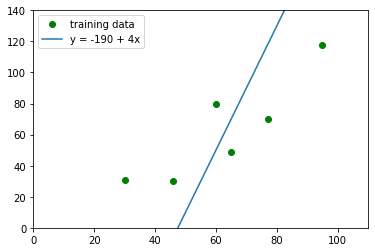

In [47]:
# Plotting Regression

fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, -190+4*x, label='y = -190 + 4x')
plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [44]:
# Calculating SSR

y_pred = []
r = []
for i in x:
    y_pred.append(-190 + 4*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

20326

> For the Regression 2, $SSR=20,326$.

> If you compare Regression 1 and Regression 2, you might notice that, as the line follows the data points, it shrinks the residuals, and lowers the Sum of Squared Residuals.

# 5. Cost Function

> Now is exciting stuff - plotting a Cost Function!

## 5.1. Try out several values for a coefficient $a$

> Let’s start with an example where we pretend to know $b=-18$. This leaves us with fˆ(x) = a · x − 18, a function of a single parameter $a$. Let’s evaluate the SSR for some values of the parameter $a$:

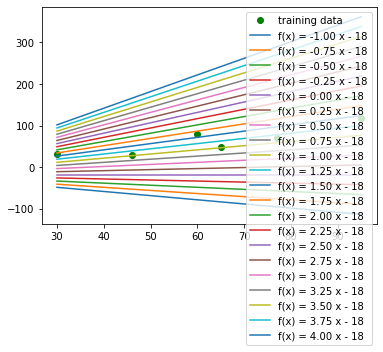

In [50]:
# Plotting Regression

fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')

a1 = np.linspace(-1,4,21) #define coefficient range: between -1 and 4

for i in range(len(a1)):
    ax.plot(x, -18 + a1[i]*x, label='f(x) = %.2f x - 18' %a1[i] )

plt.legend();

## 5.2. Build Cost Function


>Now, let’s plot calculated $SSR(a)$ values over a changing parameter $a$ on the graph, where the x-axis is an $a$ value and the y-axis is the value of the SSR, (as shown in Figure 3.6a in the [MLS](https://themlsbook.com) book)

In [17]:
# Defined Cost Function J

def J(a0, a1, x, y, m):
    J = 0
    for i in range(m):
        J += ((a0 + a1*x[i]) - y[i] )**2
    return J

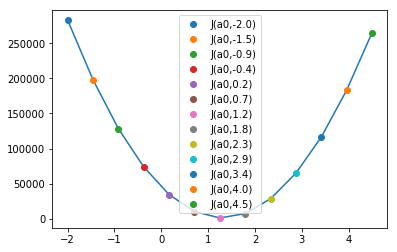

In [18]:
# Plotting 2-D Cost Function for coefficient

fig, ax = plt.subplots()
a = np.linspace(-2,4.5,13) ## 
a1 = np.linspace(-2,4.5,13) 

ax.plot(a, J(-18,a,x,y,m=len(x)), c='C0')
for i in range(len(a1)):
    ax.plot(a1[i], J(-18,a1[i],x,y,m=len(x)), 'o', label='J(a0,%.1f)' %a1[i])
plt.legend();

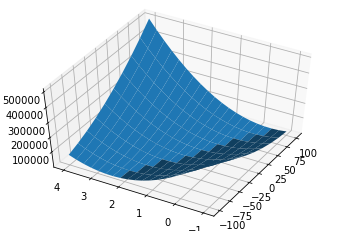

In [19]:
# Plotting Cost Function for coefficient and intercept 

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
a0 = np.linspace(-100,100,10)
a1 = np.linspace(-1,4,20)
aa0, aa1 = np.meshgrid(a0, a1)
ax.plot_surface(aa0, aa1, J(aa0,aa1,x,y,m=len(x)))
ax.view_init(50,-150)

# 6. Gradient Descent 

> Let's see the gradient descent is action.

## 6.1. Original Regression

(0.0, 110.0)

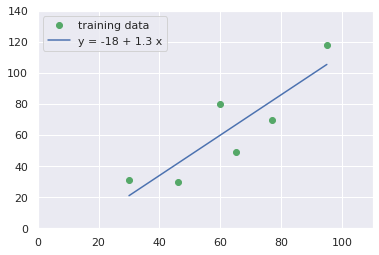

In [0]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, -18 + 1.3*x, label='y = {} + {} x'.format(-18, 1.3))
plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [39]:
# Calculating SSR

y_pred = []
r = []
for i in x:
    y_pred.append(-18 + 1.3*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

1248.1500000000003

## 6.2. Gradient Steps

We know that our cost function $J(a)$ is

$
\begin{equation}
\begin{split}
    J(a) &= \sum\Big(y_i - (ax_i-18)\Big)^2 \\
    &= \Big(31-(a*30-18)\Big)^2+\Big(30-(a*46-18)\Big)^2+\Big(80-(a*60-18)\Big)^2+\\
    &+\Big(49-(a*65-18)\Big)^2+\Big(70-(a*77-18)\Big)^2+\Big(118-(a*95-18)\Big)^2
\end{split}
\end{equation}
$

Let's take the derivative of this function with the respect to parameter $a$:

\begin{equation}
\begin{split}
    \underbrace{\frac{\partial}{\partial \ a} \ J(a)}_\text{slope} &=\underbrace{\frac{\partial}{\partial \ a}\Big(31-(a*30-18)\Big)^2}_\text{2*30*(31-(a*30-18))*(-1)}+\frac{\partial}{\partial \ a}\Big(30-(a*46-18)\Big)^2+\frac{\partial}{\partial \ a}\Big(80-(a*60-18)\Big)^2+\\
    &+\frac{\partial}{\partial \ a}\Big(49-(a*65-18)\Big)^2+\frac{\partial}{\partial \ a}\Big(70-(a*77-18)\Big)^2+\frac{\partial}{\partial \ a}\Big(118-(a*95-18)\Big)^2
\end{split}
\end{equation}

Using a chain rule for each term, we will get this equation: 

\begin{equation}
\begin{split}
    \frac{\partial}{\partial \ a} \ J(a) &=(-2*30)\Big(31-(a*30-18)\Big)+(-2*46)\Big(30-(a*46-18)\Big)+(-2*60)\Big(80-(a*60-18)\Big)+\\
    &+(-2*65)\Big(49-(a*65-18)\Big)+(-2*77)\Big(70-(a*77-18)\Big)+(-2*95)\Big(118-(a*95-18)\Big)
\end{split}
\end{equation}




Now that we have the derivative, gradient descent will use it to find where the Sum of Squared Residuals is the lowest. Our algorithm does not know the true value of $a$ that would minimize $J(a)$ (which is $a=1.3$). Hence, it will start by setting $a=0$. 

### 6.2.0 First, let's derive cost function

In [63]:
# !pip3 install sympy
import sympy as sym

In [546]:
# Calculating a derivative
a = sym.Symbol('a')
f = (31-(a*30-18))**2+(30-(a*46-18))**2+(80-(a*60-18))**2+(49-(a*65-18))**2+(70-(a*77-18))**2+(118-(a*95-18))**2
sym.diff(f)

51590*a - 67218

### 6.2.1. Step 1 

First step is to plug $a=0$ into the derivative:

In [574]:
a = 0
d = 51590*a-67218

print('Derivative = ', d)

Derivative =  -67218


Thus, when $a=0$, the slope of the curve = -67218. 

Gradient descent use step size to get to the minimum point. The closer we get to the optimal value for the $a$, the smaller the step sizes. Gradient descent determines the **Step Size** by multiplying the slope $a$ by a small number called the learning rate $l$. 

For now, let's take $l=0.00001$ and calculate the Step Size:

\begin{equation}
    \begin{split}
        Step \ Size &= J(a) * l \\
        &=(-67218)*0.00001 \\
        &=-0.67218
    \end{split}
\end{equation}

In [575]:
l = 0.00001


step_size = d*l
print('Step Size = ', step_size)

Step Size =  -0.67218


And then we update $a$: 
\begin{equation}
    \begin{split}
        a_{new} &= a - Step \ Size \\
        &=0-(-0.67218)=0.67218
    \end{split}
\end{equation}



In [576]:
a = a-step_size
print('At Step 1, a = ', a)

At Step 1, a =  0.67218


### 6.2.2. Step 2

Following the same logic, we now use the new coefficient $a$ to calculate new  derivative:

In [577]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -32540.2338


In [578]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.3254


In [579]:
a = a-step_size
print('At Step 2, a = ', round(a, 5))

At Step 2, a =  0.99758


### 6.2.3. Step 3

In [580]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -15752.7272


In [581]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.15753


In [582]:
a = a-step_size
print('At Step 3, a = ', round(a, 5))

At Step 3, a =  1.15511


### 6.2.4. Step 4

In [583]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -7625.8952


In [584]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.07626


In [585]:
a = a-step_size
print('At Step 4, a = ', round(a, 5))

At Step 4, a =  1.23137


### 6.2.5. Step 5

In [586]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -3691.6959


In [587]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.03692


In [588]:
a = a-step_size
print('At Step 5, a = ', round(a, 5))

At Step 5, a =  1.26829


### 6.2.6. Step 6

In [589]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -1787.15


In [590]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.01787


In [591]:
a = a-step_size
print('At Step 6, a = ', round(a, 5))

At Step 6, a =  1.28616


### 6.2.7. Step 7

In [592]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -865.1593


In [593]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00865


In [594]:
a = a-step_size
print('At Step 7, a = ', round(a, 5))

At Step 7, a =  1.29481


### 6.2.8. Step 8

In [595]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -418.8236


In [596]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00419


In [597]:
a = a-step_size
print('At Step 8, a = ', round(a, 5))

At Step 8, a =  1.299


### 6.2.9. Step 9

In [598]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -202.7525


In [599]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00203


In [600]:
a = a-step_size
print('At Step 9, a = ', round(a, 5))

At Step 9, a =  1.30102


### 6.2.10. Step 10

In [601]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -98.1525


In [602]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00098


In [603]:
a = a-step_size
print('At Step 10, a = ', round(a, 5))

At Step 10, a =  1.30201


### 6.2.11. Step 11

In [604]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -47.5156


In [605]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00048


In [606]:
a = a-step_size
print('At Step 11, a = ', round(a, 5))

At Step 11, a =  1.30248


### 6.2.12. Step 12

In [607]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -23.0023


In [608]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00023


In [609]:
a = a-step_size
print('At Step 12, a = ', round(a, 5))

At Step 12, a =  1.30271


### 6.2.13. Step 13

In [610]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -11.1354


In [611]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -0.00011


In [612]:
a = a-step_size
print('At Step 13, a = ', round(a, 5))

At Step 13, a =  1.30282


### 6.2.14. Step 14

In [613]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -5.3907


In [614]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -5e-05


In [615]:
a = a-step_size
print('At Step 14, a = ', round(a, 5))

At Step 14, a =  1.30288


### 6.2.15. Step 15

In [616]:
d = 51590*a-67218
print('Derivative = ', round(d, 4))

Derivative =  -2.6096


In [617]:
step_size = d*l
print('Step Size = ', round(step_size, 5))

Step Size =  -3e-05


In [618]:
a = a-step_size
print('At Step 15, a = ', round(a, 5))

At Step 15, a =  1.3029


## 6.3. Different Initialization

In [619]:
a = 2.23

### 6.3.1. Step 1

In [620]:
d = 51590*a-67218
print('Derivative = ', d)

Derivative =  47827.7


In [621]:
l = 0.00001


step_size = d*l
print('Step Size = ', step_size)

Step Size =  0.478277


In [622]:
a = a-step_size
print('At Step 1, a = ', round(a, 5))

At Step 1, a =  1.75172


### 6.3.2. Step 2

In [623]:
#step 2

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 2, a = ', round(a, 5))

Derivative =  23153.3896
Step Size =  0.23153
At Step 2, a =  1.52019


### 6.3.3. Step 3

In [624]:
#step 3

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 3, a = ', round(a, 5))

Derivative =  11208.5559
Step Size =  0.11209
At Step 3, a =  1.4081


### 6.3.4. Step 4

In [625]:
#step 4

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 4, a = ', round(a, 5))

Derivative =  5426.0619
Step Size =  0.05426
At Step 4, a =  1.35384


### 6.3.5. Step 5

In [626]:
#step 5

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 5, a = ', round(a, 5))

Derivative =  2626.7566
Step Size =  0.02627
At Step 5, a =  1.32758


### 6.3.6. Step 6

In [627]:
#step 6

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 6, a = ', round(a, 5))

Derivative =  1271.6129
Step Size =  0.01272
At Step 6, a =  1.31486


### 6.3.7. Step 7

In [628]:
#step 7

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 7, a = ', round(a, 5))

Derivative =  615.5878
Step Size =  0.00616
At Step 7, a =  1.3087


### 6.3.8. Step 8

In [629]:
#step 8

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 8, a = ', round(a, 5))

Derivative =  298.006
Step Size =  0.00298
At Step 8, a =  1.30572


### 6.3.9. Step 9

In [630]:
#step 9

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 9, a = ', round(a, 5))

Derivative =  144.2647
Step Size =  0.00144
At Step 9, a =  1.30428


### 6.3.10. Step 10

In [631]:
#step 10

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 10, a = ', round(a, 5))

Derivative =  69.8386
Step Size =  0.0007
At Step 10, a =  1.30358


In [632]:
#step 11

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 10, a = ', round(a, 5))

Derivative =  33.8088
Step Size =  0.00034
At Step 10, a =  1.30324


In [633]:
#step 12

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 10, a = ', round(a, 5))

Derivative =  16.3669
Step Size =  0.00016
At Step 10, a =  1.30308


In [634]:
#step 13

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 10, a = ', round(a, 5))

Derivative =  7.9232
Step Size =  8e-05
At Step 10, a =  1.303


In [635]:
#step 14

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 10, a = ', round(a, 5))

Derivative =  3.8356
Step Size =  4e-05
At Step 10, a =  1.30296


In [636]:
#step 15

d = 51590*a-67218
print('Derivative = ', round(d, 4))

step_size = d*l
print('Step Size = ', round(step_size, 5))

a = a-step_size
print('At Step 10, a = ', round(a, 5))

Derivative =  1.8568
Step Size =  2e-05
At Step 10, a =  1.30294
